<h1>
<font color="#ff2e2e">
CamScanner
</font>
</h1>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

<h3><font color = "#079e05"> Utilities </font></h3>

In [3]:
def imshow(im):
    width, height, *channels = im.shape
    if channels:
        # By default, OpenCV tends to work with images in the BGR format.
        # This is due to some outdated practices, but it has been left in the library.
        # We can iterate the channels in reverse order to get an RGB image.
        plt.imshow(im[:,:,::-1])
    else:
        plt.imshow(im, cmap='gray')
    plt.axis('off')

In [4]:
def reorder(vertices):
    # OpenCV *prefers* if we use `np.float32`.
    reordered = np.zeros_like(vertices, dtype=np.float32)
    add = vertices.sum(1)
    reordered[0] = vertices[np.argmin(add)]
    reordered[2] = vertices[np.argmax(add)]
    diff = np.diff(vertices, axis=1)
    reordered[1] = vertices[np.argmin(diff)]
    reordered[3] = vertices[np.argmax(diff)]
    return reordered

<h3><font color = "#079e05"> Image </font></h3>

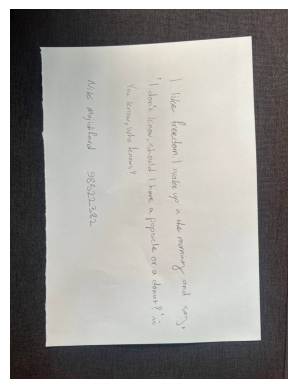

In [5]:
im = cv2.imread('images/Q4/example.jpg')
width, height, *channels = im.shape
imshow(im)

<h3><font color = "#079e05"> Process </font></h3>

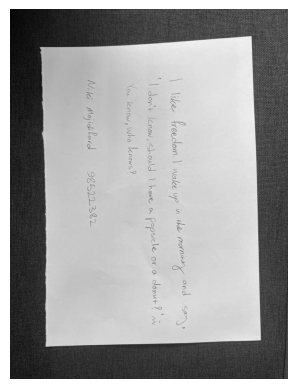

In [6]:
def to_grayscale(im):
    	
    gray_img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
 
    return gray_img
grayscale = to_grayscale(im)
imshow(grayscale)

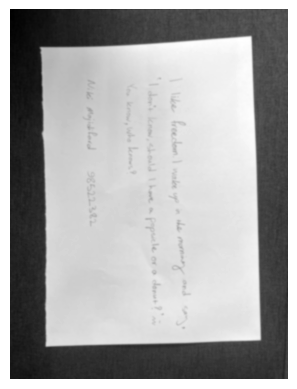

In [7]:
def blur(im):
    blur = cv2.GaussianBlur(im, (15,15), 0) 
    return blur
blurred = blur(grayscale)
imshow(blurred)

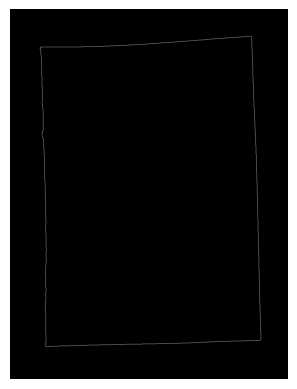

In [8]:
def to_edges(im):
   
    edges = cv2.Canny(im, 100, 150)
    return edges
edges = to_edges(blurred)
imshow(edges)

In [9]:
def find_vertices(im):
    #contour

    contours, hierarchy = cv2.findContours(im, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    final = []
    maxx = 0
    for c in contours:
        area = cv2.contourArea(c)
        perimeter =  cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c,  0.02 * perimeter, True)
        if len(approx) == 4:
            if area > maxx:
                final = approx
                maxx = area
                    
    vertices = []
    for item in final: 
        vertices.append(item[0])
        
    vertices = np.float32([vertices[0],vertices[1],vertices[2],vertices[3]])
    return vertices



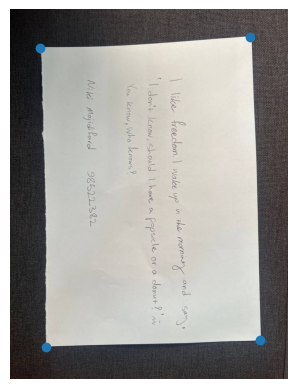

In [10]:
imshow(im)

vertices = find_vertices(edges)

plt.scatter([x for x, y in vertices], [y for x, y in vertices])

In [11]:
def crop_out(im, vertices):
    # Your code goes here.
    
    target = np.float32([[0,0],[0,height],[width, height],[width,0]])
    
    
    transform = cv2.getPerspectiveTransform(vertices, target)  # get the top or bird eye view effect
    return cv2.warpPerspective(im, transform, (width, height))

In [12]:
def enhancement(image): 
    alpha = 1.2
    beta = 1.4
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return  cv2.detailEnhance(adjusted, sigma_s=10, sigma_r=0.15)

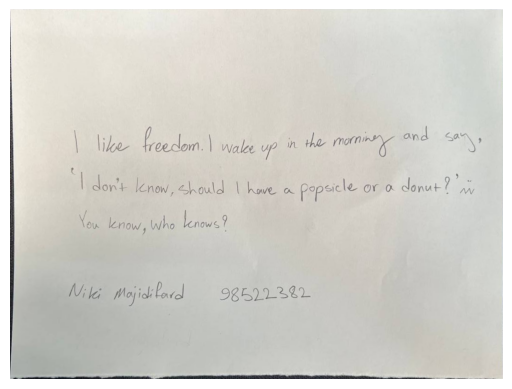

In [13]:
cropped = crop_out(im, vertices)
enhanced = enhancement(cropped)
imshow(cropped)

<h3><font color = "#079e05"> Show the result </font></h3>

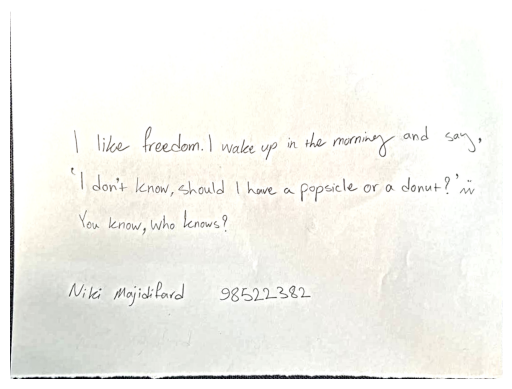

In [14]:
imshow(enhanced)